# 2.지도학습

## 2.3.7 (한국어판 부록)배깅,엑스트라 트리, 에이다부스트
 - 배깅, 엑스트라 트리, 에이다부스트는 scikit-learn에서 제공하는 앙상블 알고리즘.
 - 보통은 앙상블 방법으로 랜덤 포레스트와 그레이디언트 부스팅 알고리즘을 많이 사용한다.

In [118]:
# 실습하기 전 import문
import numpy as np
import pandas as pd
import mglearn
import sklearn
from IPython.display import display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline



In [119]:
from matplotlib import rc
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
%matplotlib inline

In [120]:
# 실습하기 전, 2.3.7에서 사용할 two_moons데이터셋과 cancer데이터셋 만들기
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm,ym = make_moons(n_samples=100,noise=0.25,random_state=3)
Xm_train,Xm_test,ym_train,ym_test = train_test_split(Xm,ym,stratify=ym,random_state=42)

cancer=load_breast_cancer()
Xc_train,Xc_test,yc_train,yc_test = train_test_split(cancer.data,cancer.target,random_state=0)

   ##### from preamble import *
 - 깃허브에서 다운받아야 오류없이 실행 가능.
 - https://github.com/rickiepark/introduction_to_ml_with_python 에서 preamble.py 다운해서 지금 작업하고 있는 파일과 같은 위치에 놓으면 문제 해결.
##### make_moons()함수 
 - 초승달 모양 클러스터 두 개 형상의 데이터를 형성하는 함수.
 - make_moon()명령으로 만든 데이터는 직선을 사용하여 분류할 수 없다.
 - 매개변수 -> make_moons(n_samples=100,noise=0.25,random_state=3)
   - n_samples : 표본 데이터 수. Default값 100
   - noise : 잡음의 크기. 0이면 정확한 반원을 이룬다.
   - random_state : 여러 번 실행해도 결과가 똑같이 나오도록 유사 난수 생성기에 넣을 난수 초깃값 설정.

### 배깅(Bagging)
 - 랜덤 포레스트처럼 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시키는 알고리즘.
 - 랜덤 포레스트처럼 샘플을 여러 번 뽑아 각 모델을 학습시켜 결과물을 집계하는 방법이다.
 - 랜덤 포레스트가 배깅보다 더 좋은 성능을 보이기 때문에 자주 사용된다.
    

In [121]:
# In[3] (126p)
# Bagging을 사용하여 cancer데이터셋에 로지스틱 회귀 모델 100개를 훈련하여 앙상블해보기

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(),n_estimators=100,oob_score=True,n_jobs=-1,random_state=42)
bagging.fit(Xc_train,yc_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=42, verb

##### BaggingClassifier() 매개변수 설명.
  - BaggingClassifier(LogisticRegression(),n_estimators=100,oob_score=True,n_jobs=-1,random_state=42)
    - base_estimator  
           - 평가할 하나의 model 유형. Default값은 DecisionTree.
           - 이번 예제에서는 LogisticRegression() 객체를 기반 분류기로 전달을 의미한다.
    - n_estimators  
           - 하나의 예측기에 몇 번의 실행을 할 것이냐를 물어보는 것으로 데이터셋 수 지정할 수 있는 매개변수.
    - oob_score 
           - 테스트 세트의 성능 짐작. Default값은 False.
           - 자세한 설명은 밑에...
    - n_jobs  
           - 사용할 코어 수를 지정할 수 있는 매개변수. Default값은 1.
           - 코어 두 개를 사용하면, 훈련 속도가 두 배 빨라짐을 의미한다.
           - 하지만, 코어 개수보다 크게 지정하면 도움이 되지 않는다.
           - n_jobs=-1로 지정하면, 컴퓨터의 모든 코어를 사용한다는 것을 의미한다.

- oob_score (OOB오차)
           - 배깅을 사용해 학습할 경우, 하나의 예측기를 학습시키는 과정에서 어떤 데이터는 여러 번 샘플링이 되고, 
           - 어떤 데이터는 아예 샘플링이 되지 못하는 경우가 발생한다.
           - 이때, 아예 샘플링 되지 못한 데이터를 OOB(Out Of Bag)샘플이라고 한다.
           - 훈련에 사용되지 못했기에, 예측기가 훈련을 마친 후 평가용 데이터로 사용할 수 있다.
           - 따라서, 앙상블의 평가는 각 예측기의 OOB평가를 모아 평균을 낸 수치로 계산한다. (oob_score=True일 때 가능.)
              - (추가) RandomForestClassifier도 지원하는 매개변수.
    

In [122]:
# In[4]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train,yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test,yc_test)))
print("OOB 샘플의 정확도 : {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 0.962
테스트 세트 정확도: 0.958
OOB 샘플의 정확도 : 0.948


In [123]:
# In[5]:
# 결정트리에 배깅 적용하기.
   # 단, 결정 트리로 수행하는 것보다 랜덤 포레스트로 배깅을 사용하는 것이 더 편리함.
    
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5,n_jobs=-1,random_state=42)
bagging.fit(Xm_train,ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

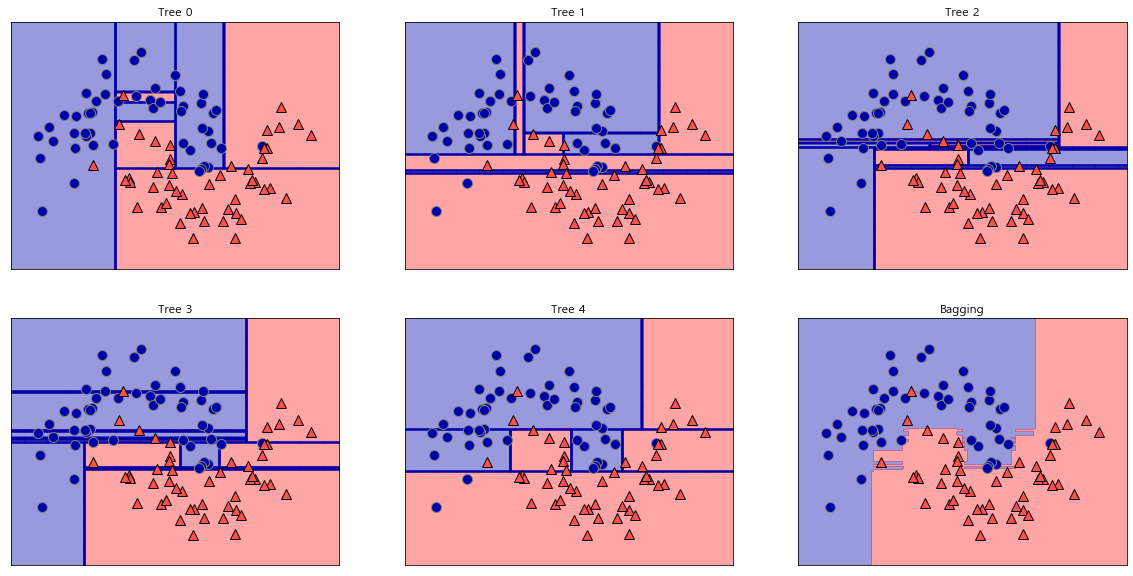

In [124]:
# In[6]:
# 배깅 분류기에 있는 결정 트리의 결정 경계 시각화.

fig,axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(bagging,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

##### In[6] Code 설명
- 랜덤포레스트와 매우 유사함.(118p 참고)
- 함수 설명.
    - figsize=(20,10) : 최초 창의 크기 지정.
    - axes.ravel() : ravel()함수는 다차원배열을 1차원 배열로 바꾸는 것이다. (reshape()와 반대함수.)
    - mglearn.plots.plot_2d_separator() : 2차원 데이터셋 분할 평면 그리는 함수.
    - discrete_scatter() : 2차원 산점도 그리는 함수.

In [125]:
# In[7] & In[8] :
# Cancer데이터셋 DecisionTreeClassifier()모델 100개 훈련하여 앙상블한 코드
# 기반 분류기에 전달할 객체만 다르고 , In[3]&In[4] 와 동일. (In[3]&In[4]는 LogisticRegression()사용.)

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, 
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플의 정확도: 0.951


### 엑스트라 트리
 - 랜덤 포레스트와 비슷하지만, 엑스트라 트리는 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾는다.
     - 랜덤 포레스트 : DecisionTreeClassifer(splitter='best') / 엑스트라 트리 : DecisionTreeClassifier('random')
 - 부트스트랩 샘플링을 적용하지 않는다. 
 - 포레스트 트리의 각 후보 특성을 무작위로 분할하는 식으로 무작위성을 증가시킨다.
    -  무작위성을 증가시키면 일반적으로 모델의 편향이 늘어나지만, 분산이 감소한다.
 - 예측 방식은 랜덤 포레스트와 동일하게 각 트리가 만든 확률값의 평균을 사용한다.

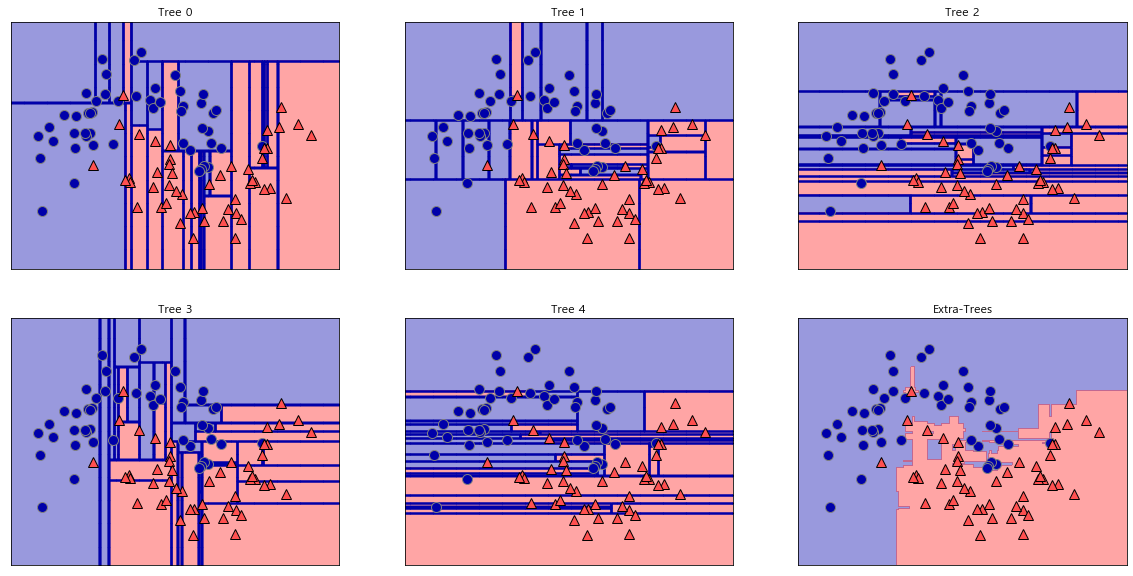

In [126]:
# In[9]& In[10] :
# two_moons 데이터셋에 엑스트라 트리 적용하여 결정 경계 확인해보기.
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train,ym_train)

fig,axes = plt.subplots(2,3, figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),xtree.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(xtree,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Extra-Trees")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

##### In[9]& In[10] 결과
 - Tree 0 & Tree 1 & Tree 2  Tree 3 & Tree 4
    - 후보 노드를 랜덤하게 분할한 다음 최선의 분할을 찾기 때문에 개별 트리의 결정 경계가 더 복잡해졌다.
 - Extra Trees
    - 개별 트리를 앙상블한 엑스트라 트리의 결정 경계는 비교적 안정적이다.

In [12]:
# In[11] & In[12] :
# ExtraTreesClassifier 트리 개수를 100으로 지정하여 cancer데이터셋 적용해보기.

xtree = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=0)
xtree.fit(Xc_train,yc_train)

print("훈련 세트 정확도: {:.3f}".format(xtree.score(Xc_train,yc_train)))
print("테스트 세트 정확도: {:.3f}".format(xtree.score(Xc_test,yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


##### In[11] & In[12] 설명
 - 랜덤 포레스트와 거의 같은 성능을 낸다. (119p비교해보기. 훈련,테스트 정확도 일치.)
 - 엑스트라 트리가 랜덤 포레스트보다 계산 비용이 비교적 적지만, 무작위 분할 때문에 일반화 성능을 높이려면 종종 많은 트리를 만들어야 한다.
 - 따라서, 일반적으로는 랜덤 포레스트가 더 선호!!

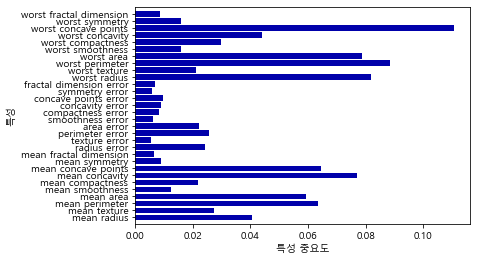

In [13]:
# In[13]:
# 엑스트라 트리의 특성 중요도 시각화해보기.

n_features = cancer.data.shape[1]
plt.barh(range(n_features),xtree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1,n_features)
plt.show()

##### In[13] 설명
 - 랜덤 포레스트와 비교해보기 (120p 참고)
    - 엑스트라 트리가 전반적으로 랜덤 포레스트보다 특성 중요도를 높게 평가하고 있다.
      - 엑스트라 트리가 더 폭넓은 시각으로 특성들을 평가한다는 뜻임.

### 에이다부스트(Adaptive Boosting)
 - 그레이디언트 부스팅처럼 약한 학습기를 사용한다.
 - 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시키는 알고리즘.
 - AdaBoostClassifier의 Default값은 DecisionTreeClassifier(max_depth=1)이다.
 - base_estimaor 매개변수에 다른 모델 지정 가능.
 - 순차적으로 학습해야 하기 때문에, n_jobs 매개변수 지원하지 않는다.(그레이디언트 부스팅과 동일.)

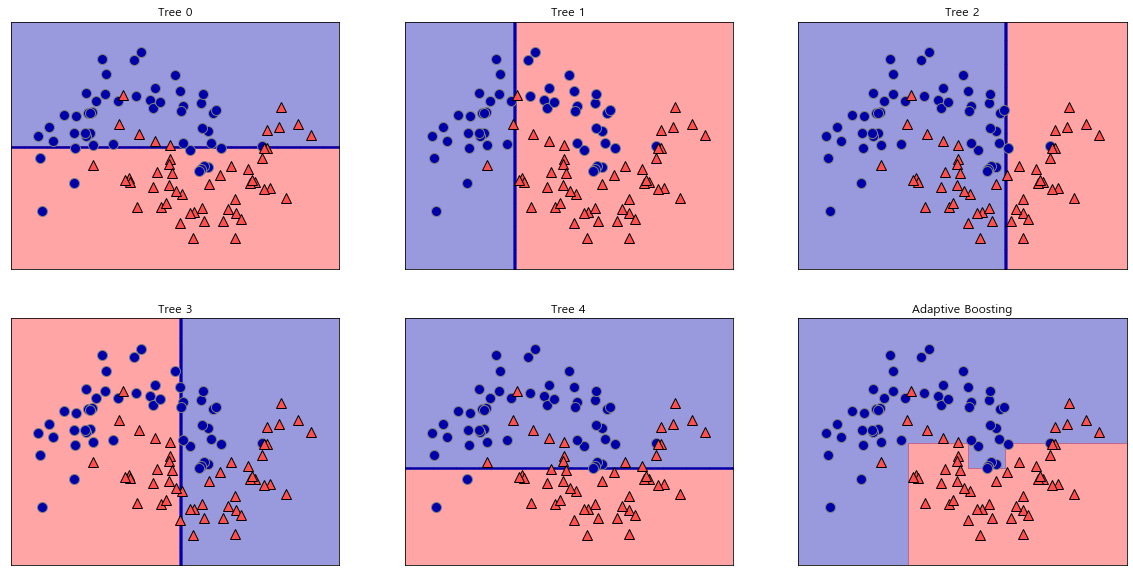

In [14]:
# In[14] & In[15]:
# two_moons데이터셋에 에이다부스트 적용하여 결정 경계 그려보기.

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5,random_state=42)
ada.fit(Xm_train,ym_train)

fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),ada.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
mglearn.plots.plot_2d_separator(ada,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Adaptive Boosting")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

##### In[14] & In[15]:
 - AdaBoostClassifier는 깊이가 1인 결정 트리를 사용하기 때문에, 각 트리의 결정 경계가 직선 하나이다.
    - 따라서, 앙상블된 결정 경계도 다른 앙상블 모델에 비해 좀 더 단순하다.

In [15]:
# In[16] & In[17]
# cancer데이터셋에 에이다부스트 적용해보기

ada = AdaBoostClassifier(n_estimators=100,random_state=42)
ada.fit(Xc_train,yc_train)

print("훈련 세트 정확도: {:3f}".format(ada.score(Xc_train,yc_train)))
print("테스트 세트 정확도: {:3f}".format(ada.score(Xc_test,yc_test)))

훈련 세트 정확도: 1.000000
테스트 세트 정확도: 0.986014


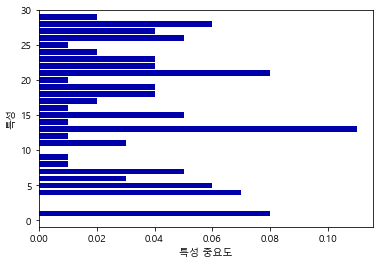

In [16]:
# In[18] :
plt.barh(range(n_features),ada.feature_importances_,align='center')
#plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1,n_features)
plt.show()

##### In[18] 설명
 - 아주 얕은 트리를 앙상블했기 때문에 일반화 성능이 조금 더 향상되었다.
 - 특히, 다른모델에서 부각되지 않았던 'area error'특성을 크게 강조하고 있다.

## 2.3.8 커널 서포트 벡터 머신
+ 커널 서포트 벡터 머신 (보통 SVM으로 불림) : 입력 데이터에서 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것 
+ 분류와 회귀 모두 사용 가능  
+ 수학적 정의는 이 책의 범위를 넘어가므로 이 알고리즘의 이면에 있는 아이디어 정도만 조금 살펴볼 것

### 선형 모델과 비선형 특성  
+ 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적
+ 선헝 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱 하는 식으로 새로운 특성을 추가하는 것
+ 인위적 데이터셋 살펴보자

Text(0, 0.5, '특성 1')

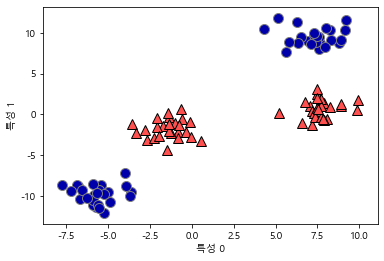

In [17]:
#In[77]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

##### in[77] 설명
 - 선형적으로 구분되지 않는 클래스를 가진 이진 분류 데이터셋

Text(0, 0.5, '특성 1')

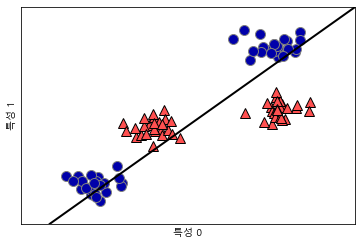

In [18]:
# In[78]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

##### In[78] 설명
 - 선형 SVM으로 만들어진 결정 경계
 - 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 위의 그림과 같이 이런 데이터셋에는 잘 들어 맞지 않음.

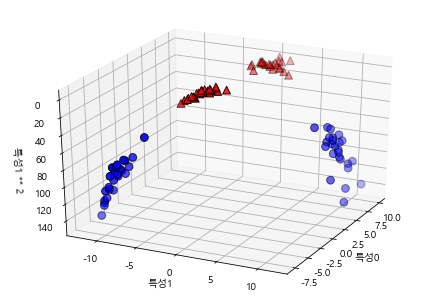

In [19]:
#In[79]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show()

##### In[79] 설명
+ 특성 1에서 유용한 세 번째 특성을 추가하여 In[78]에서 확장한 데이터셋.
+ 두번째 특성을 제곱한 특성 1 ** 2를 새로운 특성으로 추가해 입력 특성을 확장함.
+ (특성 0, 특성 1, 특성 1 ** 2)의 3차원 데이터 포인트로 표현됨

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1 ** 2')

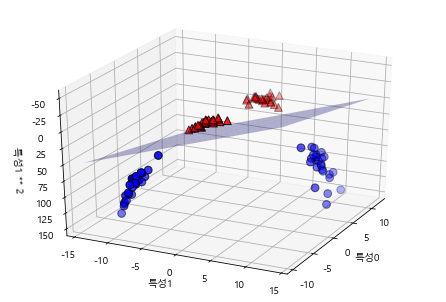

In [20]:
#In[80]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

##### In[80] 설명
+ 확장된 3차원 데이터셋에서 선형 SVM이 만든 결정 경계
+ 새로운 데이터셋에서는 위의 그림과 같이 선형 모델과 3차원 공간의 평면을 사용하여 두 클래스를 구분할 수 있음

Text(0, 0.5, '특성 1')

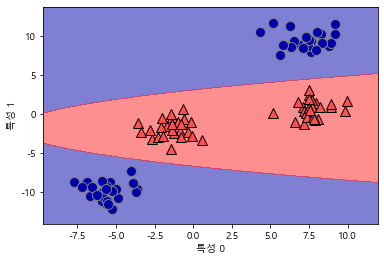

In [21]:
#In[81]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

##### In[81] 설명
+ 원래 두 개 특성에 투영한 In[80]의 결정 경계
+ 원래 특성으로 투영해보면 이 선형 SVM모델은 더 이상 선형이 아님.
+ 아래 그림과 같이 타원에 가까운 모습을 띄고 있음.

### 커널 기법
+ 많은 경우 어떤 특성을 추가해야 할지 모르고 특성을 많이 추가하면 연산 비용이 커짐
+ 수학적 기교를 사용하여 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시킬 수 있는데 이를 '커널 기법'이라고 함
+ 커널 기법은 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리를 계산함
+ 서포트 벡터 머신에서 데이터를 고차원 공간에 매핑하는 데 많이 사용하는 방법은 두 가지임

    1. 다항식 커널 : 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산
    2. RBF(가우시안 커널로도 불림) : 차원이 무한한 특성 공간에 매핑함. 설명하기가 어렵지만 모든 차수의 모든 다항식을 고려한다고 이해. 특성의 중요도는 고차항이 될수록 줄어듦.

### SVM 이해하기

+ 학습이 진행되는 동안 SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지 배우게 됨.
+ 일반적으로 두 클래스 사이의 경계에 위치한 데이터 포인트들인 **'서포터 벡터'** 만 결정 경계를 만드는 데 영향을 줌.
+ 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정
+ 분류 결정은 서포트 벡터까지의 거리에 기반. 서포트 벡터의 중요도는 훈련 과정에서 학습
+ 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산됨

+ 밑에 그림은 두 개의 클래스를 가진 2차원 데이터셋에 서포트 벡터 머신을 학습시킨 결과를 보여줌
+ 결정 경계는 검은 실선, 서포트 벡터는 굵은 테두리로 크게 그림
+ forge 데이터셋에 SVM을 학습시켜 그린 그래프임

Text(0, 0.5, '특성 1')

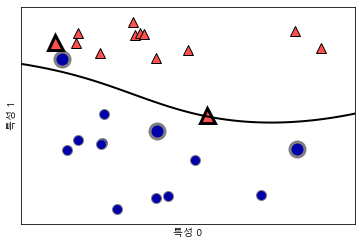

In [22]:
#In[82]:
from sklearn.svm import SVC

X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

##### In[82] 설명
+ RBF 커널을 사용한 SVM으로 만든 결정 경계와 서포트 벡터
+ 위 그림에서 SVM은 매우 부드럽고 비선형 경계를 만들었다.

### SVM 매개변수 튜닝

+ gamma 매개변수 : 
    + 앞 공식에 나와있는 $\gamma$로 가우시안 커널 폭의 역수에 해당함
    + 하나의 훈련 샘플이 미치는 영향의 범위를 결정
    + (가우시안 커널의 반경) $\propto$ (샘플의 영향 반경) $\propto$ ($1 \over \gamma$)
    
    
   
+ C 매개변수 : 
    + 선형 모델에서 사용한 것과 비슷한 규제 매개변수
    + 각 포인트의 중요도(정확히는  dual_coef_값)을 제한  

    + 이 매개변수를 다르게 했을 때 어떻게 변경되는지 아래 그림에 나와있음

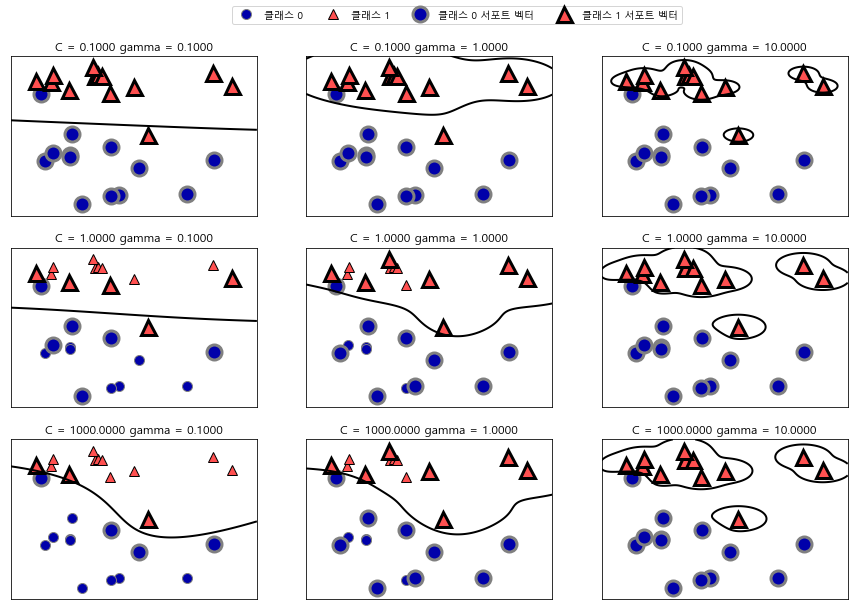

In [23]:
#In[83]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))

##### In[83] 설명
+ 왼쪽에서 오른쪽으로 갈수록 gamma 매개변수 증가됨
+ 작은 감마값은 가우시안 커널의 반경을 크게하여 많은 포인트들이 가까이 있는 것으로 고려되므로 왼쪽 결정 경계는  매우 부드럽고 오른쪽으로 갈수록 결정 경계는 하나의 포인트에 더 민감해짐
+ 감마 값은 결정 경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮추고 큰 감마 값은 더 복잡한 모델을 만듦



+ 위에서 아래로 갈수록 C 매개변수 증가됨
+ 작은 C는 매우 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작으므로 왼쪽 위의 결정 경계는 거의 선형에 가까우면 잘못 분류되 데이터 포인트가 경계에 거의 영향을 주지 않음.
+ 반대로 C를증가시키면 포인트들이 모델에 큰 영향을 주며 결정 경계를 휘어서 정확하게 분류하게 함

In [24]:
# In[84]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### In[84] 설명
+ RBF 커널 SVM을 유방암 데이터셋에 적용한 것.

Text(0, 0.5, '특성 크기')

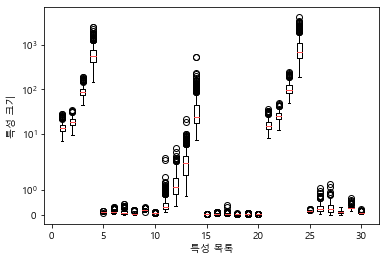

In [25]:
#In[85]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

##### In[85] 설명
+ SVM은 매개변수 설정과 데이터 스케일에 매우 민감하다.
+ 특히, 입력 특성의 범위가 비슷해야한다.
+ 따라서, 위의 그림은 유방암 데이터셋 각 특성의 최솟값과 최댓값을 로그 스케일로 나타낸 그림이다.
+ 위 그림에서 보면 유방암 데이터셋의 특성은 자릿수 자체가 완전히 다르므로 커널 SVM에 큰 영향을 준다는 것을 알 수 있다. 

### SVM을 위한 데이터 전처리

+ 위에 문제를 해결하는 방법은 특성 값의 범위가 비슷해지도록 조정하는 것임
+ 모든 특성 값을 평균이 0이고 단위 분산이 되도록 하거나, 0과 1사이로 맞추는 방법을 많이 사용함

In [26]:
# In[86]:
# 직접 전처리하는 방법.

# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [27]:
# In[87]:

# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

# In[88]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
# In[89]:

svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### In[89] 설명
+ In[88]에서 C나 gamma값을 증가시켜 좀 더 복잡한 모델을 만든 것이다.

### SVM 장단점

+ 장점 
    + 다양한 데이터셋에서 잘 작동
    + 데이터의 특성이 몇 개 안되더라도 복잡한 결정 경계를 만들 수 있음


+ 단점 
    + 샘플이 많을 때는 잘 맞지 않음
    + 데이터 전처리와 매개변수 설정에 신경을 많이 써야 함

## 2.3.9 신경망(딥러닝)
- 다층 퍼셉트론(multilayer perceptrons, MLP)  
    - 복잡한 딥러닝 알고리즘의 출발점  
    - 비교적 간단하게 분류와 회귀에 쓸 수 있는 딥러닝 알고리즘.
    - (기본) 피드포워드(feed-forward) 신경망, 보통은 신경망으로 불린다.

### 신경망 모델
- MLP는 여러 단계를 거쳐 결정을 만들어내는 선형모델의 일반화된 모습  

\begin{align}
\hat{y} & = w[0] * x[0] + w[1] * x[1]....+w[p] * x[p] + b
\end{align}

$\hat{y}$은 x[0]에서 x[p]까지의 입력 특성과 w[0]에서 w[p]까지 학습된 계수의 가중치 합이다

In [29]:
# In[90]:
# display(mglearn.plots.plot_single_hidden_layer_graph())

##### In[90] 설명
![nn](t1.png)
+ 위의 수식인 선형 회귀 모델의 예측 공식을 그림으로 나타냄.
+ 입력 특성과 예측은 노드(Node)로, 계수는 노드 사이의 연결로 나타낸 로지스틱 회귀.
+ 즉, 왼쪽 노드는 입력 특성을 나타내며, 연결선은 학습된 계수를 표현하고 오른쪽 노드는 입력의 가중치 합, 즉 출력을 나타낸다.

In [30]:
# In[91]:
# display(mglearn.plots.plot_single_hidden_layer_graph())

##### In[91] 설명
![nn](t2.png)
+ 은닉층이 하나인 다층 퍼셉트론
+ MLP에서는 가중치 합을 만드는 과정이 여러 번 반복되며, 먼저 중간 단계를 구성하는 은닉 유닛을 계산하고 이를 이용하여 최종 결과를 산출하기 위해 다시 가중치 합을 계산한다.
+ 각 입력과 은닉층의 은닉 유닛 사이, 각 은닉 유닛과 출력 사이의 계수(가중치)를 학습.

- 비선형 함수  
모델을 강력하기 만들기 위해 각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수를 적용, 함수 결과의 가중치 합을 계산하여 출력을 만듬
    - 렐루(Relu): 렐루 함수는 0이하를 잘라버림  
    - 하이퍼블릭 탄젠트(tanh): 낮은 입력값은 -1로 수렴, 큰 입력값은 +1로 수렴

\begin{align}
h[0] = tanh(w[0,0] * x[0] + w[1,0] * x[1] + w[2,0] * x[2] + w[3,0] * x[3] + b[0]  
\end{align}
\begin{align}
h[1] = tanh(w[0,1] * x[0] + w[1,1] * x[1] + w[2,1] * x[2] + w[3,1] * x[3] + b[0]   
\end{align}
\begin{align}
h[2] = tanh(w[0,2] * x[0] + w[1,2] * x[1] + w[2,2] * x[2] + w[3,2] * x[3] + b[0]
\end{align}
\begin{align}
\hat{y} & = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] +b
\end{align}

w는 입력 x와 은닉충 h 사이의 가중치이고, v는 은닉충 h와 출력 y 사이의 가중치  
가중치 v와 w는 훈련 데이터에서 학습, x는 입력 특성, y은 계산된 출력, h는 중간 계산값  
*정해야 하는 중요한 매개변수는 은닉층의 유닛 개수*

Text(0, 0.5, 'relu(x), tanh(x)')

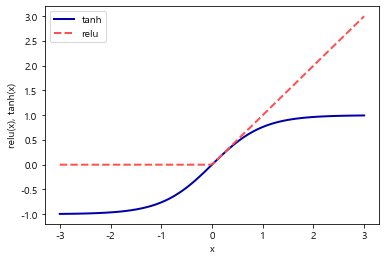

In [31]:
#In[92]:
import numpy as np
import matplotlib.pyplot as plt
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

##### In[92] 설명
+ 하이퍼볼릭 탄젠트 활성화 함수와 렐루 활성화 함수

In [32]:
# In[93]:
# mglearn.plots.plot_two_hidden_layer_graph()

##### In[93] 설명
![nn](t3.png)
+ 은닉층이 두 개인 다층 퍼셉트론
+ 이와 같이 많은 은닉층으로 구성된 대규모의 신경망이 생기면서, 이를 '딥러닝'이라고 부른다.

### 신경망 튜닝

Text(0, 0.5, '특성 1')

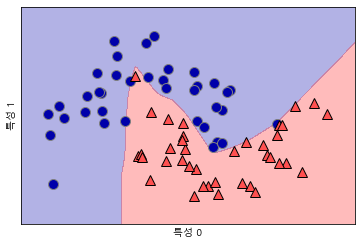

In [129]:
#In[94]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

##### In[95] 설명
+ 은닉 유닛이 100개인 신경망으로 학습시킨 two_moons 데이터셋 결정 경계
+ two_moons 데이터셋에 분류를 위한 다층 퍼셉트론(MLP) 구현인 MLPClassifier를 적용한 코드.
+ 그림을 보듯 매우 비선형적이지만 비교적 매끄러운 결정 경계가 만들어짐.

##### 더 매끄러운 결정 경계를 원한다면, 은닉층 추가, 은닉 유닛 추가 또는 tanh 함수 사용하기.

Text(0, 0.5, '특성 1')

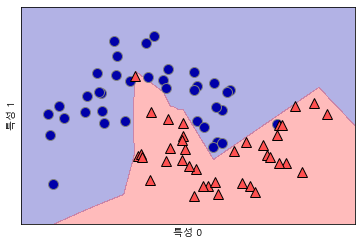

In [130]:
#In[96]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

##### In[96] 설명
+ 10개의 은닉 유닛을 가진 두 개의 은닉층과 렐루 활성화 함수로 만든 결정 경계

Text(0, 0.5, '특성 1')

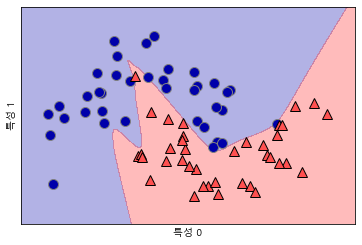

In [131]:
# In[97]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

##### In[97] 설명
+ 10개의 은닉 유닛을 가진 두 개의 은닉층과 tanh 활성화 함수로 만든 결정 경계

##### MLPClassifier에서의 alpha 매개변수 
+ 리지 회귀와 선형 분류기에서 한 것처럼 L2페널티를 사용해서 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어하는 역할.
+ 기본값은 매우 낮게(거의 규제하지 않게) 되어 있다.

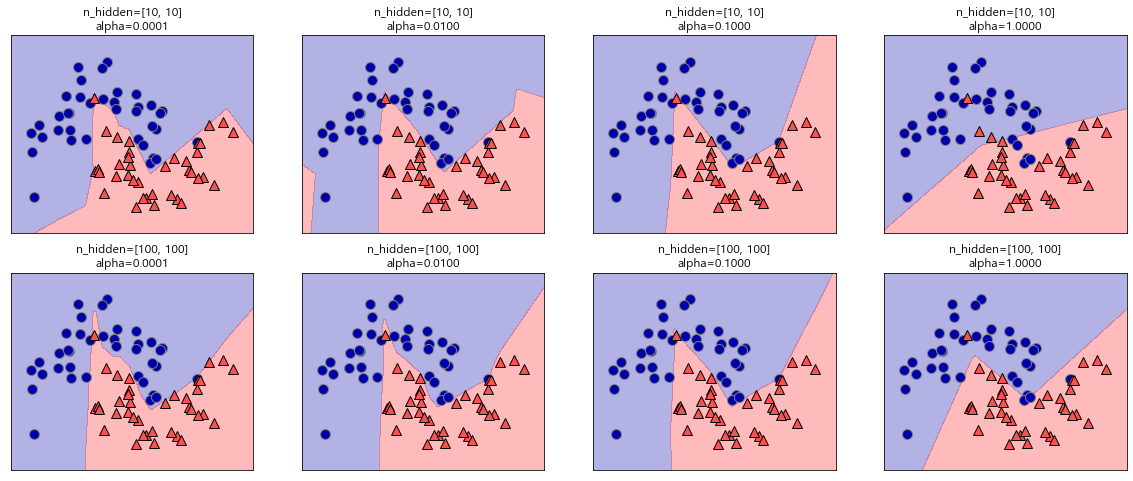

In [132]:
#In[98]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=1000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))


##### In[98] 설명
+ two_moons 데이터셋에 유닛이 각각 10개와 100개인 은닉층 2개를 사용했을 때 다른 alpha값이 미치는 영향을 나타냄.

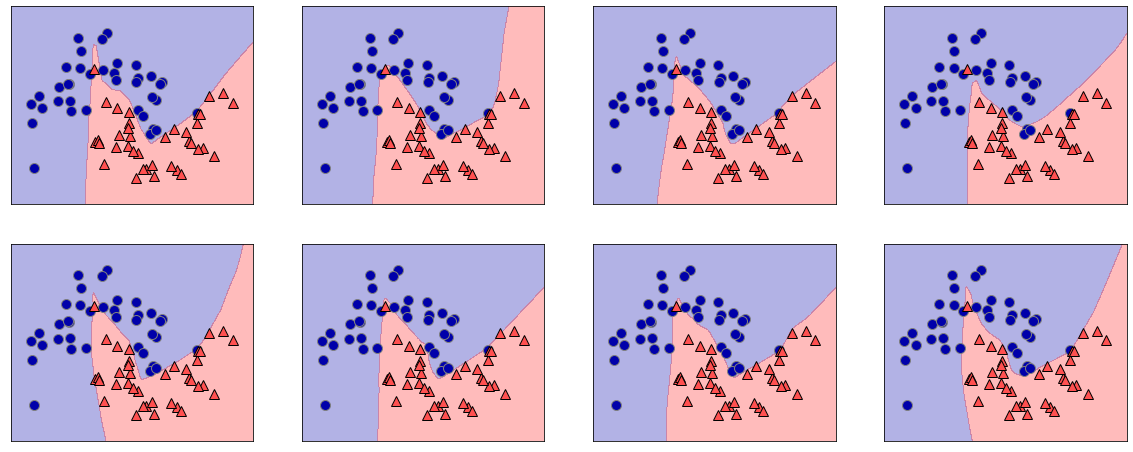

In [46]:
#In[99]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

##### In[99] 설명
+ 신경망에서는 학습을 시작하기 전에 가중치를 무작위로 설정하며 이 무작위한 초기화가 모델의 학습에 영향을 준다.
+ 따라서, 같은 매개변수를 사용하더라도 초깃값이 다르면 모델이 달라질 수 있다.
+ In[99]그림은 무작위로 다른 초깃값을 주되 같은 매개변수로 학습한 결정 경계를 보여주고 있다.

In [113]:
# In[100] & In[101]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최대값:\n", cancer.data.max(axis=0))

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

유방암 데이터의 특성별 최대값:
 [  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]
훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


##### In[100] & In[101] 설명
+ 실제 데이터인 유방암 데이터셋에 MLPClassifier 적용.

In [114]:
#In[102]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##### In[102] 설명
+ 성능을 위해 모든 입력 특성을 평균 0, 분산 1이 되도록 변형.

In [115]:
# In[103]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


##### In[103] 설명
+ In[102] 실행하면, 최대 반복 횟수에 도달했다며 경고창이 뜬다.
+ 따라서, In[103]은 반복 횟수를 늘려서 훈련 세트와 테스트 세트의 성능을 올렸다.(max_iter사용)

In [116]:
# In[104]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


##### In[104] 설명
+ In[103]의 결과를 보면, 훈련 세트와 테스트 세트 사이에 성능 차이가 있음.
+ In[104]는 일반화 성능을 더 올리기 위해 모델의 복잡도를 낮춘 코드.(alpha매개변수 증가.)

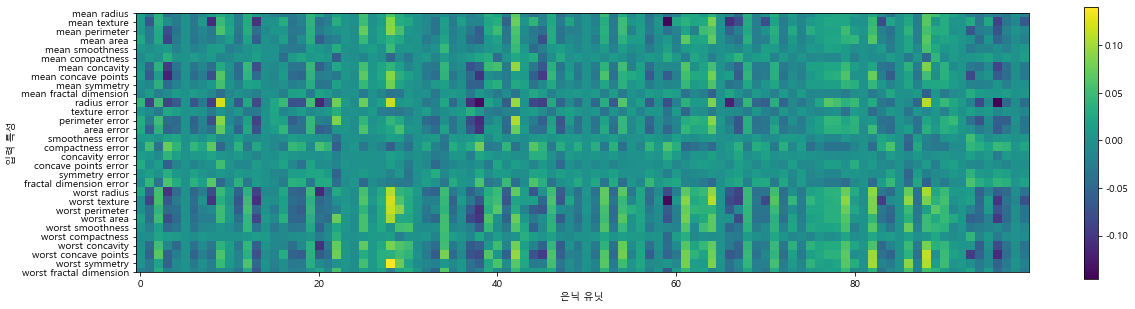

In [117]:
# In[106]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

##### In[106] 설명
+ 유방암 데이터셋으로 학습시킨 신경망의 첫 번째 층의 가중치 히트맵
+ 위의 그림은 입력과 은닉층 사이의 학습된 가중치를 보여준다.
+ 밝은 색은 큰 양수 값을 나타내고 어두운 색은 음수 값을 나타낸다.

### 장단점과 매개변수

    - 장점: 대량의 데이터에 내재된 정보를 잡아내고 복잡한 모델을 만들 수 있다.
    - 단점: 학습이 오래 걸리며 데이터 전처리에 주의

### 신경망의 복잡도 추정
신경망에서 가장 중요한 매개변수는 *은닉층의 개수* 와 *각 은닉층의 유닛수*  
모델 복잡도에 관해 도움이 될 만한 측정치는 *학습된 가중치*  또는 *계수*  
  

- solver 매개변수  
모델을 학습시키는 방법 또는 매개변수 학습에 사용하는 알고리즘을 지정 가능  
    - adam(기본값): 대부분의 경우에 잘 작동하지만 데이터 스케일에 조금 민감  
    - lbfgs: 안정적이지만 규모가 큰 모델이나 대량의 데이터셋에서는 시간이 오래 걸림  
    - sgd: 다른 여러 매개변수와 함께 튜닝하여 최선의 결과를 만들 수 있다.

## 2.4 분류 예측의 불확실성 추정
- scikit-learn 분류기에서 불확실성을 추정할 수 있는 함수 두 개  
- decision_function(결정 함수)과 predict_proba(예측 확률)

In [103]:
# In[107]:
#GradientBoostingClassifier 분류기의 decision_function과 predict_proba 메서드가 어떤 역할을 하는지 살펴보기
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue" 와 "red" 로 바꿉니다
y_named = np.array(["blue", "red"])[y]

# 여러개의 배열을 한꺼번에 train_test_split 에 넣을 수 있습니다
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

##### In[107] 설명
+ GradientBoostingClassifier 분류기의 decision_function과 predict_proba 메서드가 어떤 역할인지 살펴보기 위해 인위적으로 만든 2차원 데이터셋. 

## 2.4.1 결정 함수(decision_function)

- 결정 함수의 결괏값의 크기는 (샘플 수, 클래스 수)  
- 이진 분류: 결정 함수의 반환값의 크기는 (샘플 수,)  
 - 각 샘플이 하나의 실수 값을 반환 
 - 양성: 클래스 1에 속한다고 믿는 정도/ 음성: 다른 클래스에..

In [104]:
# In[108]:
print("X_test.shape:", X_test.shape)
print("결정 함수 결과 형태:", gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


##### In[108] 설명
+ 결정 함수의 결괏값의 크기는 (샘플 수, 클래스 수)
+ 결정 함수의 반환값의 크기는 (샘플 수,)

In [64]:
# In[109]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다
print("결정 함수:\n", gbrt.decision_function(X_test)[:6])

결정 함수:
 [ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


##### In[109] 설명
+ 양수 값은 양성 클래스를 의미하며 음수 값은 음성(즉 다른)클래스를 의미한다.

In [65]:
# In[110]:
print("임계치와 결정 함수 결과 비교:\n",
      gbrt.decision_function(X_test) > 0)
print("예측:\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


##### In[110] 설명
+ 결정 함수의 부호만 보고도 예측 결과를 알 수 있다.

In [67]:
# In[111]:

# 불리언 값을 0과 1로 변환합니다
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용합니다
pred = gbrt.classes_[greater_zero]
# pred 와 gbrt.predict의 결과를 비교합니다
print("pred 는 예측 결과와 같다:",
      np.all(pred == gbrt.predict(X_test)))

pred 는 예측 결과와 같다: True


##### In[111] 설명
+ predict 함수의 결과 완전히 재현해보기.
+ 그렇게 하기 위해서는 classes_ 속성을 사용하기.  
+ 이진 분류에서 음성 클래스는 항상 classes_ 속성의 첫 번째 원소이고 양성 클래스는 두 번째 원소임

In [68]:
# In[112]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최소값: {:.2f} 최대값: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

결정 함수 최소값: -7.69 최대값: 4.29


##### In[112] 설명
+ decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라진다.
+ decision_function의 출력 범위가 임의의 값이라 이해하기에는 어려움이 있다.

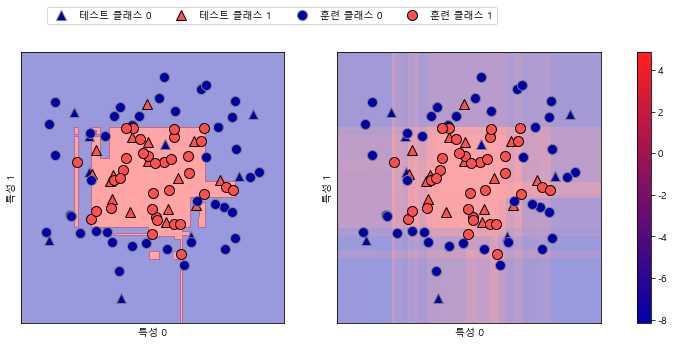

In [105]:
# In[113]:

import matplotlib.pyplot as plt
import mglearn
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))

##### In[113] 설명
+ 2차원 예제 데이터셋을 사용해 만든 그레이디언트 부스팅 모델의 결정경계(좌), 결정 함수(우)
+ 2차원 평면의 모든 점에 대해서 decision_function의 값을 색으로 표현하여 앞서 본 결정 경계와 함께 그래프로 나타낸 그림.
+ 훈련 데이터는 원모양. 테스트 데이터는 삼각형 모양.

##### 결정 함수를 사용하게 될 때의 장점 및 단점
+ 장점: 예측한 결과뿐만 아니라 분류기가 얼마나 확신하는지를 알면 추가 정보를 얻게됨
+ 단점: 결정 함수 그래프에서 두 클래스 사이의 경계를 구분하기는 어려움

## 2.4.2 예측 확률(predict_proba())

- 예측 확률의 결괏값의 크기는 (샘플 수, 클래스 수)  
- predict_proba의 출력은 각 클래스에 대한 확률
- 각 행의 첫 번째 원소는 첫 번째 클래스의 예측 확률이고, 두 번째 원소는 두 번째 클래스의 예측 확률이다.
- 이진 분류: 예측 확률의 반환값의 크기는 (샘플 수, 2)  
- 확률이기 때문에 출력값은 항상 0~1 사이의 값, 모든 클래스에 대한 확률의 합은 항상 1

In [106]:
# In[114]:
print("확률 값의 형태:", gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


In [107]:
# In[115]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("Predicted probabilities:\n",
      gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
 [[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]


##### In[115] 설명
- 위의 예시는 이진 분류이므로 두 클래스 중 하나는 50% 이상의 확신을 가질 것이며 그 클래스가 예측값이 됨  
- 데이터에 있는 불확실성이 얼마나 이 값에 잘 반영되는지는 모델과 매개변수 설정에 달림  
  - 과대적합된 모델(복잡도 높)은 불확실성이 낮음
  - 복잡도가 낮은 모델은 불확실성이 높음  
- 불확실성과 모델의 정확도가 동등하면 이 모델이 '보정'되었다고 말함

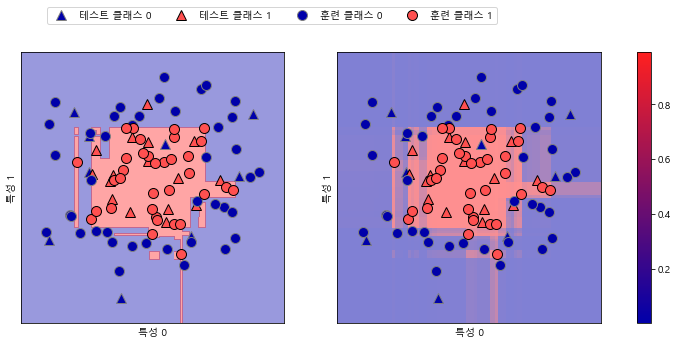

In [108]:
# In[116]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
# colorbar 를 감추지 않습니다.
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))

##### In[116] 설명
+ 결정 경계와 클래스 1의 확률을 나타낸 것.
+ In[113]의 그레이디언트 부스팅 모델의 결정 경계(좌)와 예측 확률(우)
+ 위의 그래프의 경계는 훨씬 잘 나타나 있으며, 불확실성이 있는 작은 영역들도 잘 확인할 수 있다.

## 2.4.3 다중 분류에서의 불확실성
+ decision_function과 predict_proba 메서드는 다중 분류에서도 사용 가능하다.

In [76]:
# In[117] & In[118]

from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)
print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
# plot the first few entries of the decision function
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6, :])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.997 -0.135 -1.203]
 [ 0.061 -1.908 -1.928]]


##### In[117] & In[118] 설명
+ 클래스가 3개인 iris 데이터셋에 적용
+ 다중 분류에서는 decision_function의 결괏값의 크기는 (n_samples,n_classes)이다.
+ 각 열은 각 클래스에 대한 확신 점수를 가지고 있다.
+ 수치가 크면 그 클래스일 가능성이 크고, 수치가 작으면 그 클래스일 가능성이 낮다.

In [77]:
# In[119]:
print("가장 큰 결정 함수의 인덱스:\n",
      np.argmax(gbrt.decision_function(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


##### In[119] 설명
+ 가장 큰 결정 함수를 찾아 예측 결과를 재현
   + (argmax 함수 적용:가장 큰 값을 가진 인덱스를 가져옴)

In [79]:
# In[120]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n", gbrt.predict_proba(X_test)[:6])
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]]
합: [1. 1. 1. 1. 1. 1.]


In [80]:
# In[121]:
print("가장 큰 예측 확률의 인덱스:\n",
      np.argmax(gbrt.predict_proba(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


##### In[121] 설명
+ predict_proba의 결과에 argmax 함수를 적용해서 예측 재현.

In [81]:
# In[122]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classses_에 연결:",
      logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classses_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


##### In[122] 설명
+ 주의할 점 : predict의 결과와 결정 함수,예측 확률의 결과를 비교하려면 분류기의 classes_ 속성을 사용해 클래스의 실제 이름을 얻어야 한다.